<h1 style=“font-size:30px;“>Gradient Descent Assignment</h1>

The previous section on Gradient Descent focused on how to implement the gradient calculation and weight update for a single variable ( `m` ), using simple math operations. In this assignment, you do the same, but for 2 variables.  

We will use the full form of a line i.e. `y = mx + c`.  
You need to estimate the values of two variables `m` and `c`, using Stochastic Gradient Descent.


Tasks to implement for the 2 variables:   
1. Implement the gradient calculation step for the 2 variables.
2. Implement the weight update step for the 2 variables.

### Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Section</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>2.1</h3></td> <td><h3>Implement Gradients </h3></td> <td><h3>20</h3></td> </tr>
        <tr><td><h3>2.2</h3></td> <td><h3>Implement SGD</h3></td> <td><h3>10</h3></td> </tr>
    </table>
</div>


In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# For reproducibility
tf.random.set_seed(41)
os.environ["TF_DETERMINISTIC_OPS"] = "1"


%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15, 8)

## 1 Generate Sample Data

Here we define a function that will generate some sample data based on a **linear model** in the presence of random noise. We will generate 1,000 data points for this experiment. The independent variable, `x`, has values randomly distributed between -5 to 5. Values for `m` and `c` have been specified to create the data points for the dependent variable (`y`).  

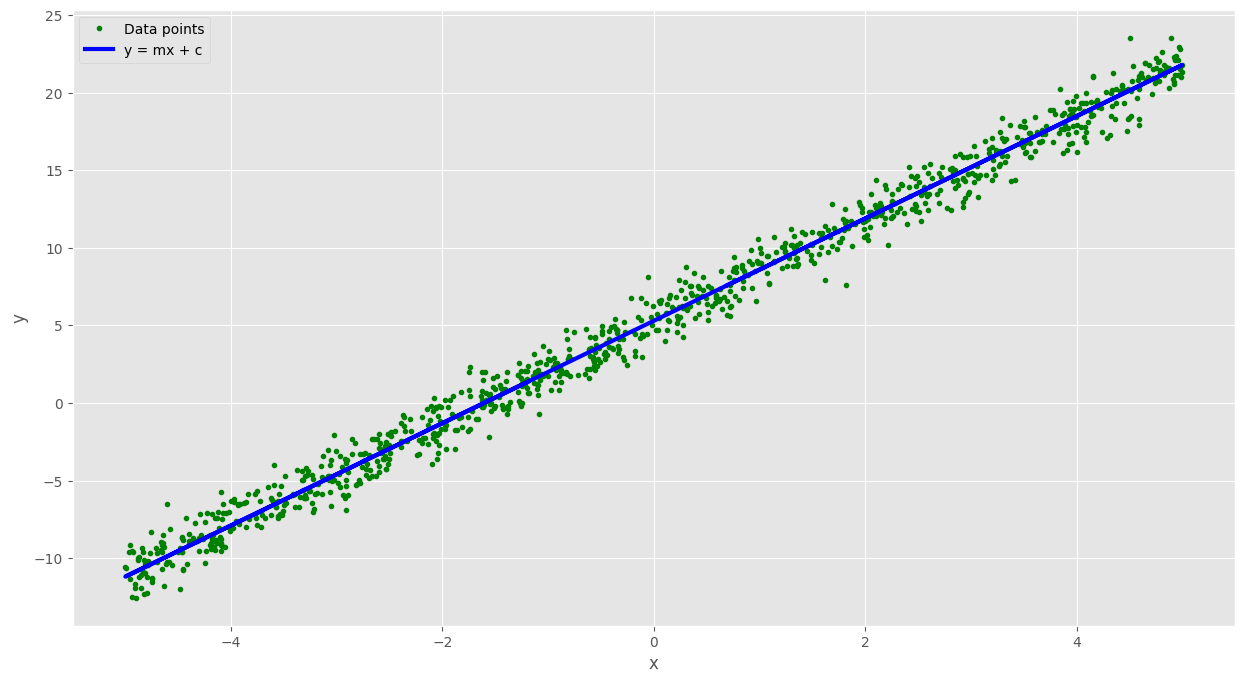

In [2]:
# Generating y = mx + c + random noise.
num_data = 1000

# True values of m and c
m_line = 3.3
c_line = 5.3


# Input (Generate random data between [-5,5]).
x = tf.random.uniform([num_data], minval=-5, maxval=5)

# Output (Generate data assuming y = mx + c + noise).
y_label = m_line * x + c_line + tf.random.normal(x.shape).numpy()
y = m_line * x + c_line

# Plot the generated data points.
plt.plot(x, y_label, ".", color="g", label="Data points")
plt.plot(x, y, color="b", label="y = mx + c", linewidth=3)
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()

The goal is to find the "unknown" parameters ($m$ and $c$) of the linear model below so that we can predict $y$, given some value of $x$.  

$$ 
y = mx + c 
$$  

We have a set of data points $(x_i, y_i)$, and they should all satisfy the equation above. i.e.,

$$ 
y_i = m x_i + c 
$$  

Since the data is not perfectly linear due to the added noise, we can represent the **error** or a **residual** as follows: 

$$ 
e_i = (y_i - m x_i -c) 
$$   


Next, we need to find a value of $m$ and $c$ that minimizes the error above. Positive or negative values of error are equally bad. So, we need to minimize the square of the above error, across all the data points.

$$ 
l_{sse} = \sum^N_{i=1}(y_i - m x_i -c)^2 \\ 
$$


This form of the **loss function** is the sum of squared errors.


## 2 Gradient Descent [30 Points]


We have already seen how the Math works for `m`. The same approach is used in the case of `m` and `c`.    
We calculate the loss function and then take partial derivatives w.r.t `m` and `c` respectively. 

$$
\begin{align}
l &= \sum^n_{i=1}(y_i - m x_i - c)^2 \\
\frac{\partial l}{\partial m}  &= -2 \sum^n_{i=1} x_i(y_i - m x_i - c) \\
\frac{\partial l}{\partial c}  &= -2 \sum^n_{i=1} (y_i - m x_i - c) \\
\end{align}
$$

To follow the slope of the curve, we move `m` in the direction of negative gradient. However, we must control the rate at which we go down the slope, so that we do not overshoot the minimum. Thus, we use a parameter $\lambda$ called the `learning rate`.
$$
\begin{align}
m_k &= m_{k-1} - \lambda \frac{\partial l}{\partial m} \\
c_k &= c_{k-1} - \lambda \frac{\partial l}{\partial c} \\ 
\end{align}
$$

That is it! 

Let's implement this in code to see that it really works. 



<!-- <div class="alert alert-block alert-info">
    <b>1. Implement Gradients: 20 Points</b>
</div> -->

### 2.1 Implement Gradients [20 Points]

**Useful tensorflow methods for this functions:**

1. [reduce_sum](https://www.tensorflow.org/api_docs/python/tf/math/reduce_sum)
2. [gather](https://www.tensorflow.org/api_docs/python/tf/gather)

In [ ]:
def gradient_wrt_m_and_c(inputs, labels, m, c, k):
    """
    All arguments are defined in the training section of this notebook.
    This function will be called from the training section.
    So before completing this function go through the whole notebook.

    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    k (torch.tensor, dtype=int): random index of data points
    """
    # gradient w.r.t to m is g_m
    # gradient w.r.t to c is g_c
    x = tf.gather(inputs, k)
    y = tf.gather(labels, k)
    g_m = -2 * tf.reduce_sum(tf.multiply(x, y - m * x - c))
    g_c = -2 * tf.reduce_sum(y - m * x - c)

    ###
    ### YOUR CODE HERE
    ###

    return g_m, g_c

**Test your code before submitting it using the below code cell.**

For the given input:
```
X = tf.convert_to_tensor([-0.0374,  2.6822, -4.1152])
Y = tf.convert_to_tensor.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
k = tf.convert_to_tensor.tensor([0, 2])
```
Output:
```
Gradient of m : -24.93
Gradient of c : 1.60
```
```

In [9]:
X = tf.convert_to_tensor([-0.0374, 2.6822, -4.1152])
Y = tf.convert_to_tensor([5.1765, 14.1513, -8.2802])
m = 2
c = 3
k = tf.convert_to_tensor([0, 2])

gm, gc = gradient_wrt_m_and_c(X, Y, m, c, k)

print(f"Gradient of m : {gm:.2f}")
print(f"Gradient of c : {gc:.2f}")

Gradient of m : -24.93
Gradient of c : 1.60


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###

### 2.2 Stochastic Gradient Descent (SGD) [10 point]

In [3]:
def update_m_and_c(m, c, g_m, g_c, lr):
    """
    All arguments are defined in the training section of this notebook.
    This function will be called from the training section.
    So before completing this function go through the whole notebook.

    g_m = gradient w.r.t to m
    c_m = gradient w.r.t to c
    """
    # Update m and c parameters.
    # store updated value of m is updated_m variable
    # store updated value of c is updated_c variable
    updated_m = m - lr * g_m
    updated_c = c - lr * g_c
    ###
    ### YOUR CODE HERE
    ###
    return updated_m, updated_c

**Test your code before submitting it using the below code cell.**

For the given input:
```
m = 2
c = 3
g_m = -24.93
g_c = 1.60
lr = 0.001
```
Output:
```
Updated m: 2.02
Updated c: 3.00
```

In [4]:
m = 2
c = 3
g_m = -24.93
g_c = 1.60
lr = 0.001
m, c = update_m_and_c(m, c, g_m, g_c, lr)

print("Updated m: {0:.2f}".format(m))
print("Updated c: {0:.2f}".format(c))

Updated m: 2.02
Updated c: 3.00


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###

## 3  Training


Iteration: 0, Loss: 29015.21484375, updated m: 2.145, updated c: 1.092


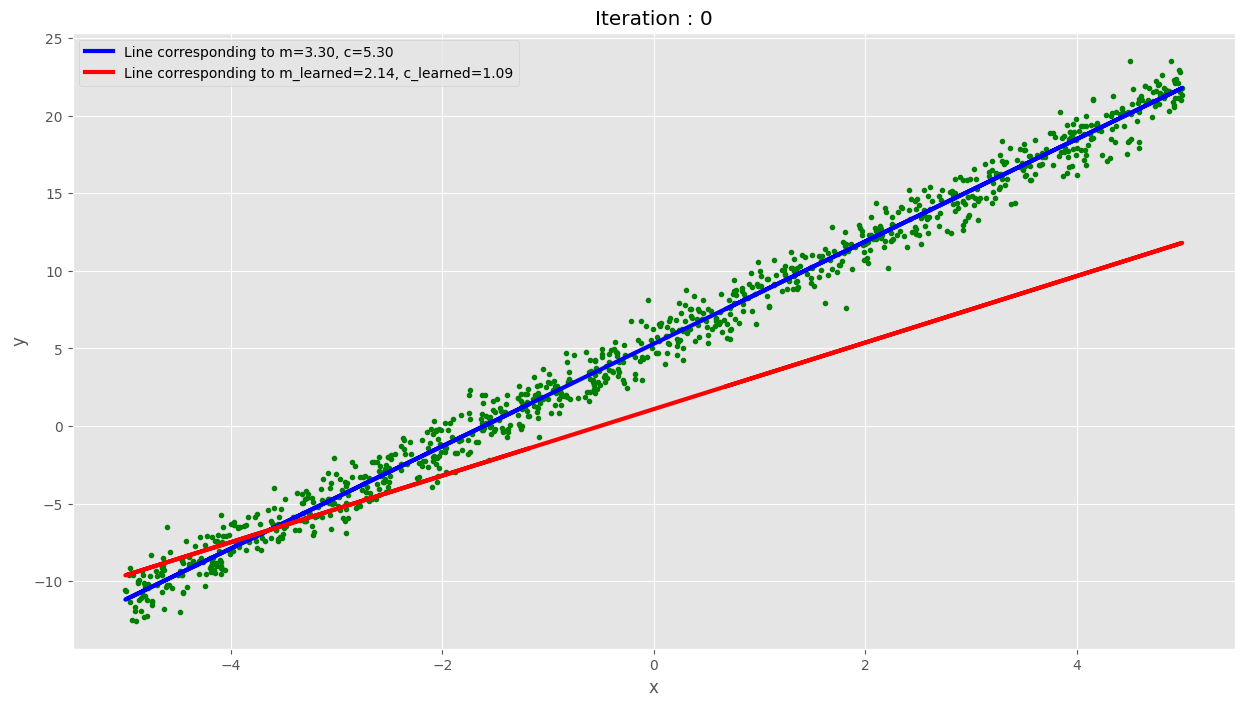

Iteration: 50, Loss: 3469.933349609375, updated m: 3.154, updated c: 3.769


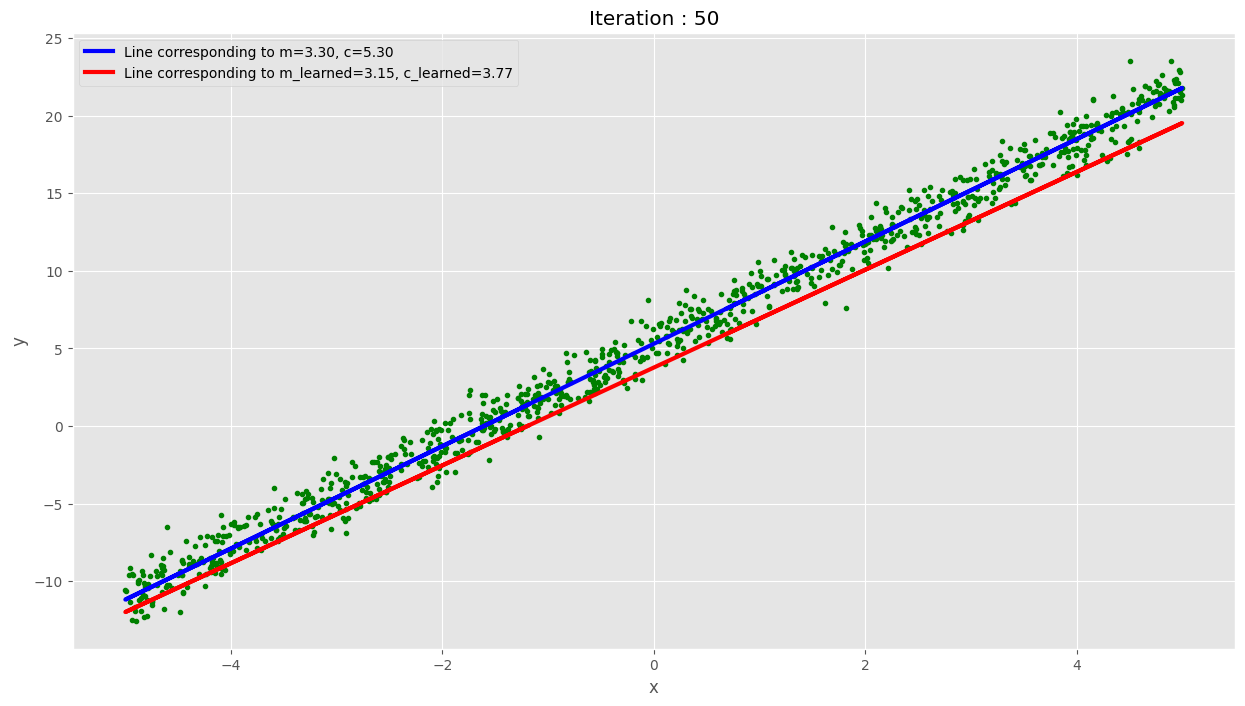

Iteration: 100, Loss: 1310.625732421875, updated m: 3.304, updated c: 4.737


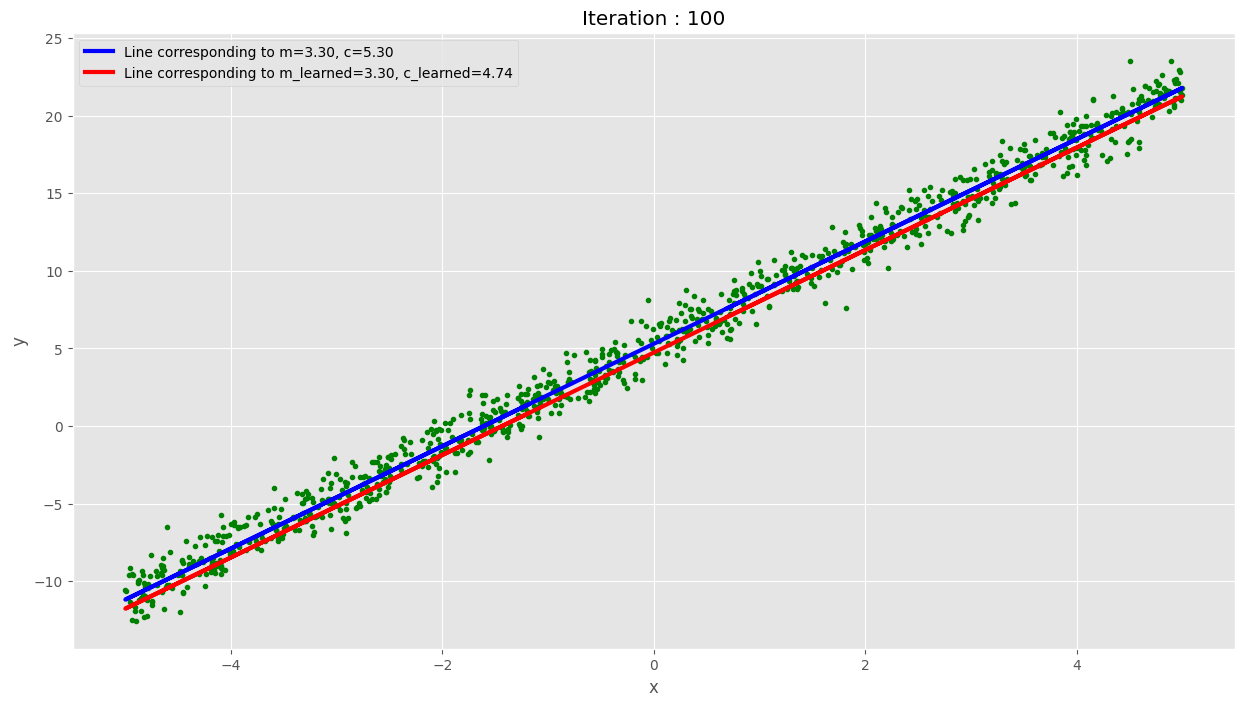

Iteration: 150, Loss: 1005.8311767578125, updated m: 3.266, updated c: 5.132


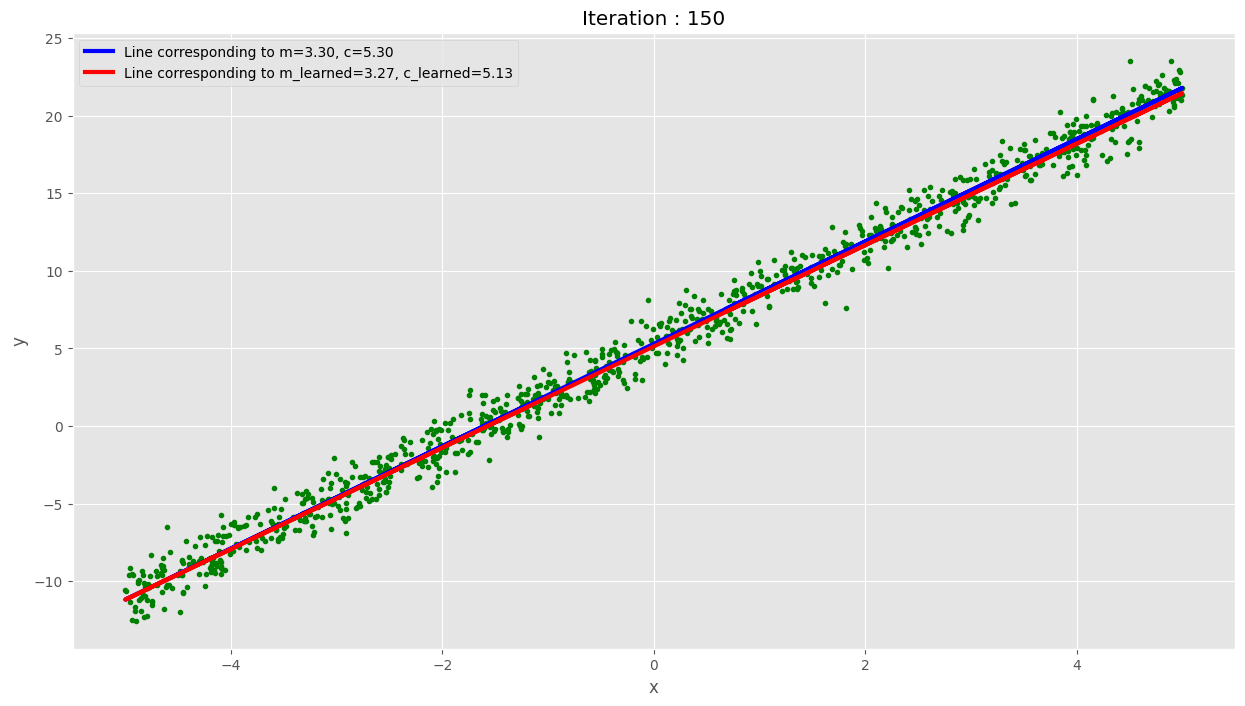

Iteration: 200, Loss: 998.65478515625, updated m: 3.335, updated c: 5.253


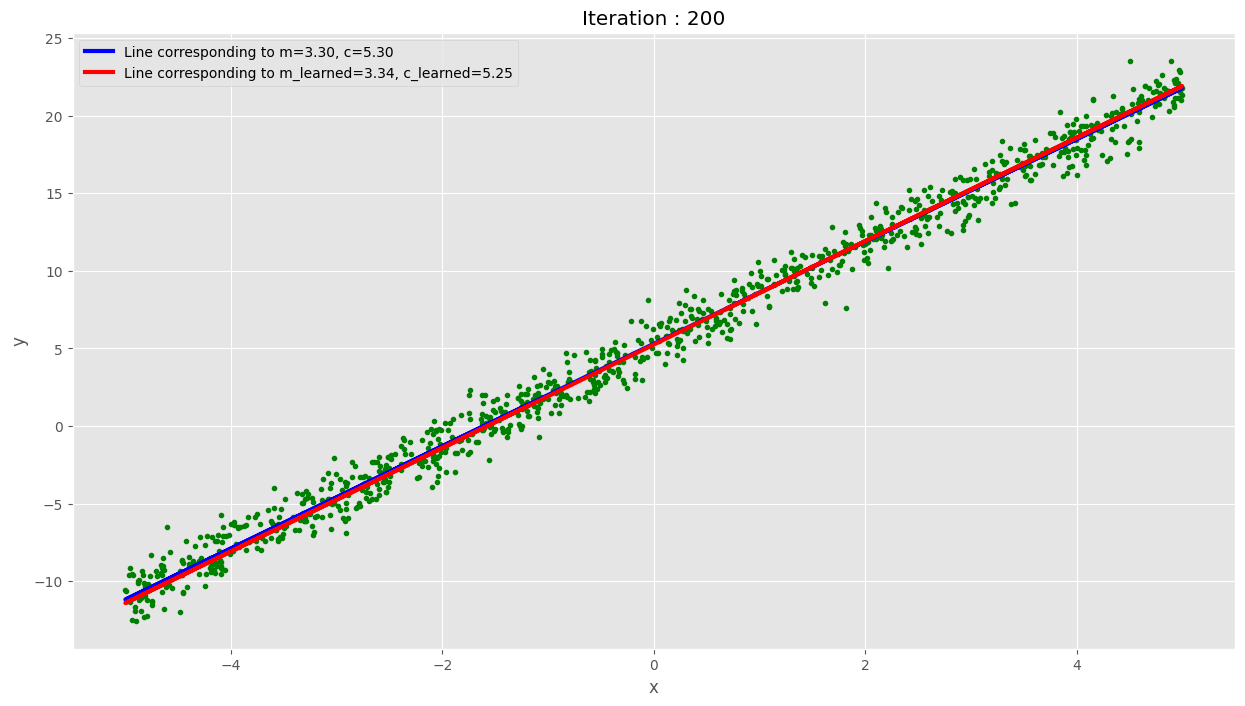

Iteration: 250, Loss: 974.9495849609375, updated m: 3.273, updated c: 5.253


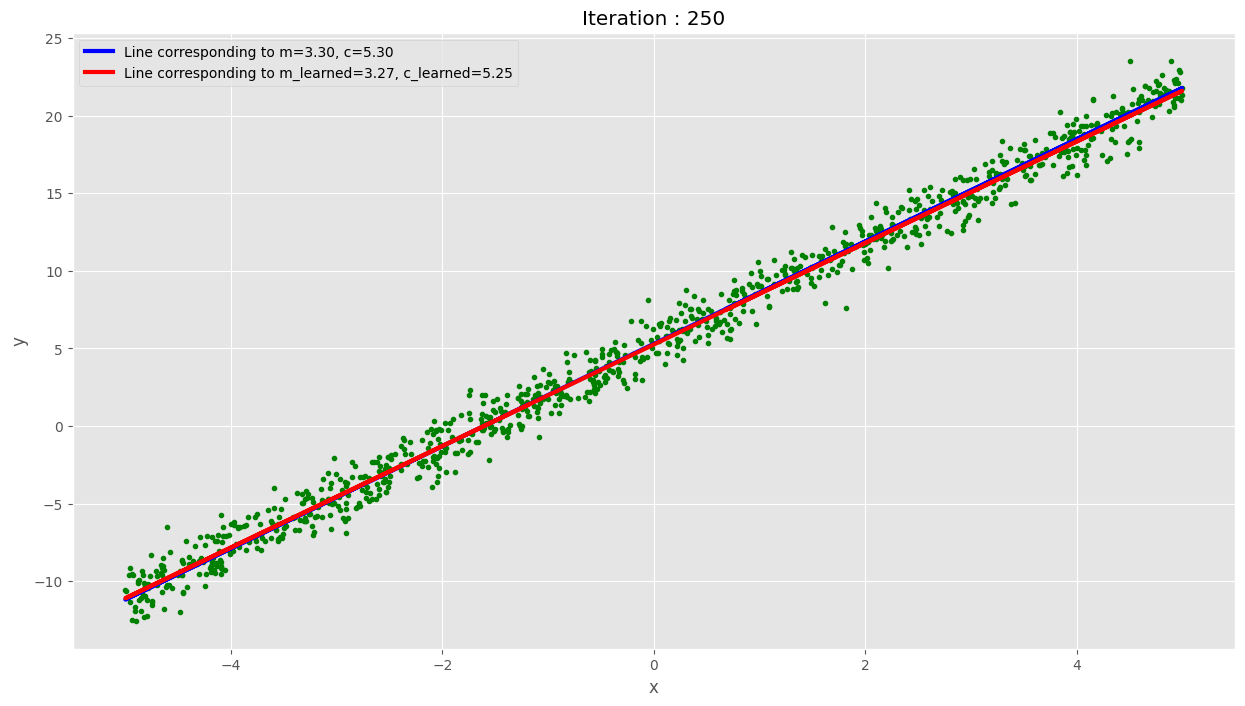

Iteration: 300, Loss: 1013.966796875, updated m: 3.213, updated c: 5.256


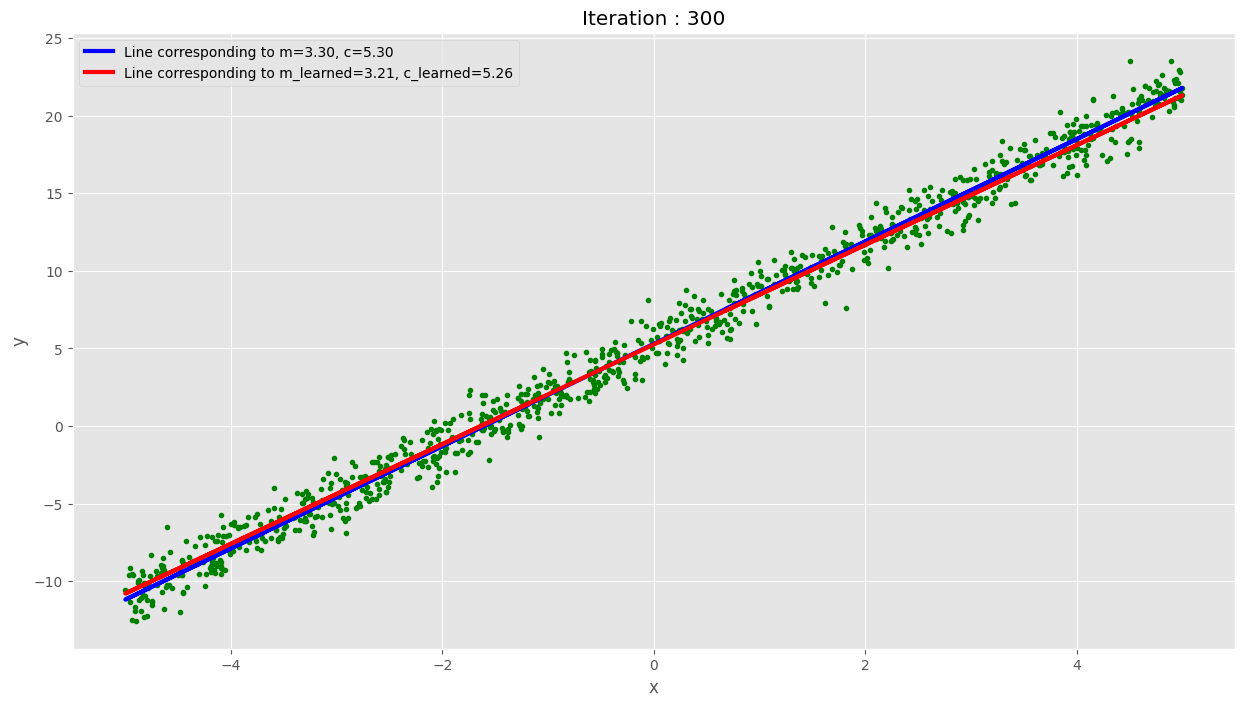

Iteration: 350, Loss: 971.365234375, updated m: 3.286, updated c: 5.287


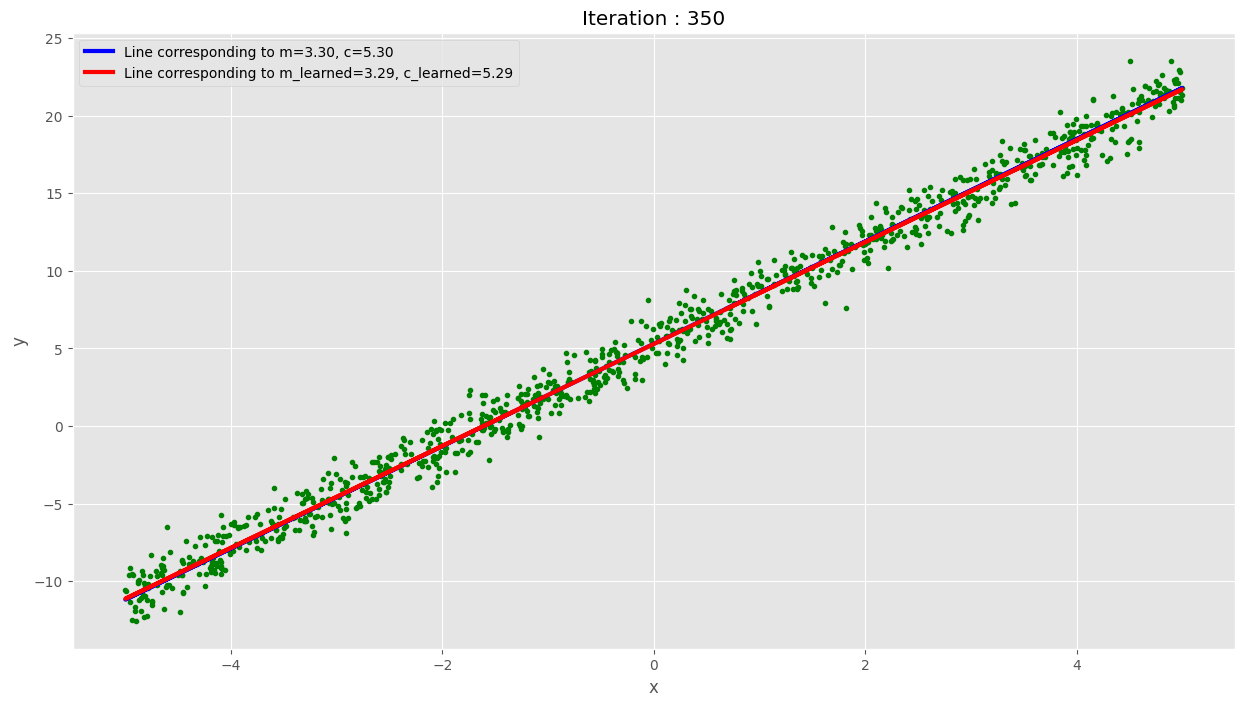

Iteration: 400, Loss: 973.3374633789062, updated m: 3.264, updated c: 5.321


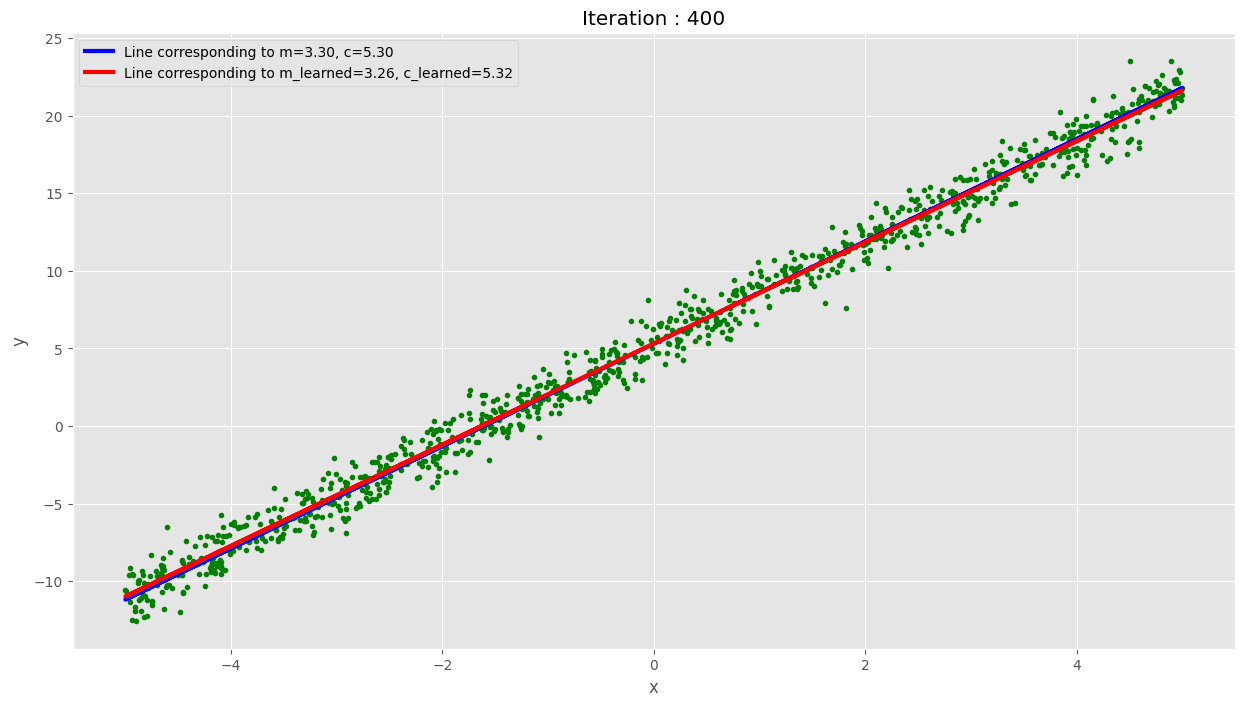

Iteration: 450, Loss: 975.1674194335938, updated m: 3.306, updated c: 5.313


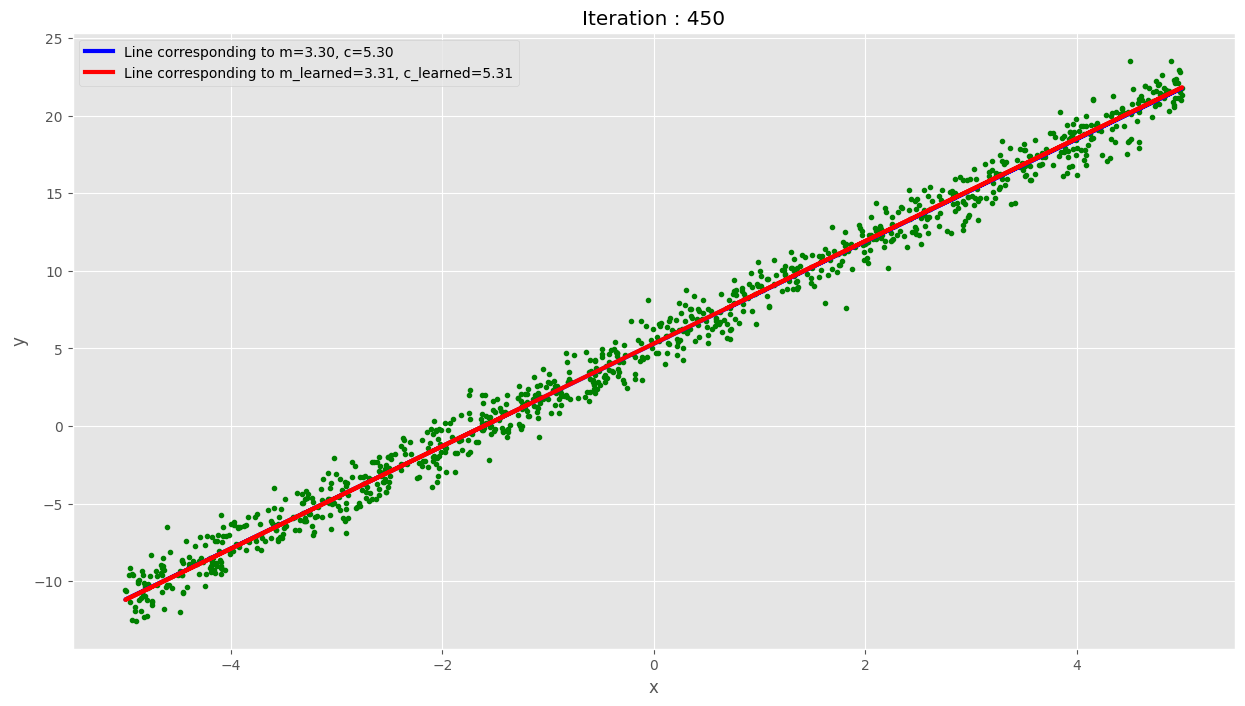

Iteration: 500, Loss: 974.125, updated m: 3.263, updated c: 5.288


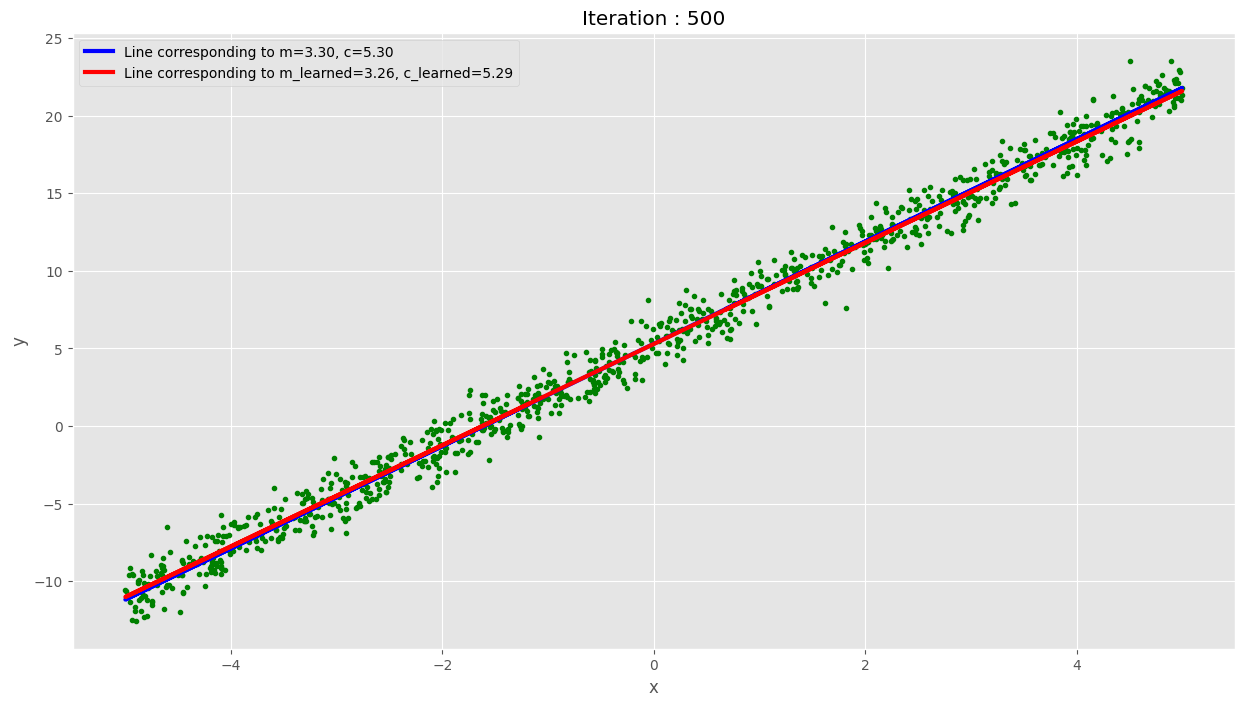

Iteration: 550, Loss: 980.15087890625, updated m: 3.309, updated c: 5.256


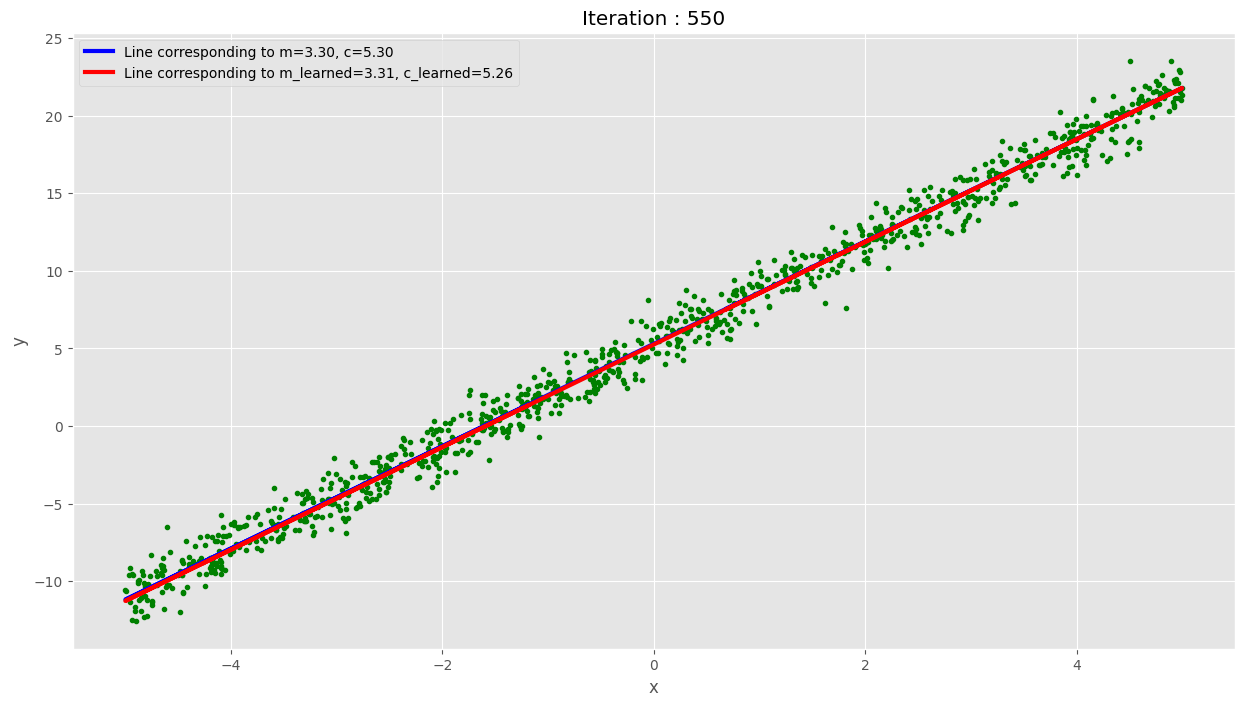

Iteration: 600, Loss: 985.8723754882812, updated m: 3.245, updated c: 5.251


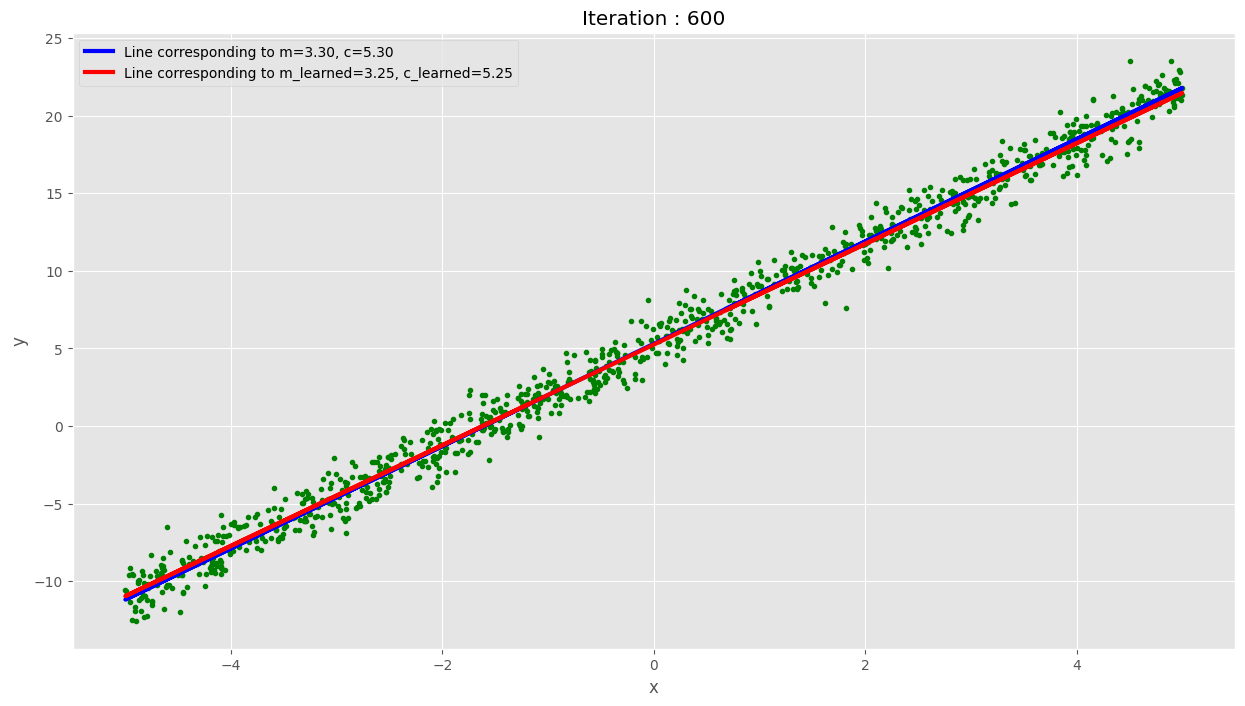

Iteration: 650, Loss: 984.338134765625, updated m: 3.246, updated c: 5.260


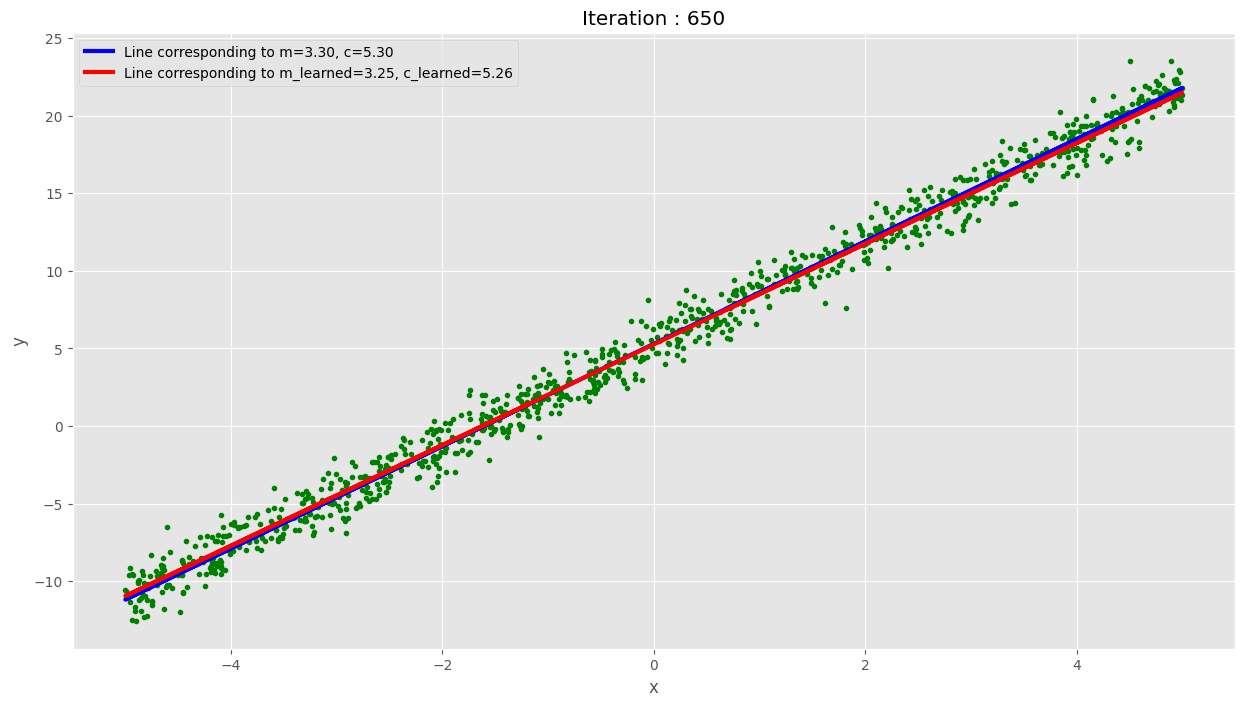

Iteration: 700, Loss: 971.3121948242188, updated m: 3.275, updated c: 5.294


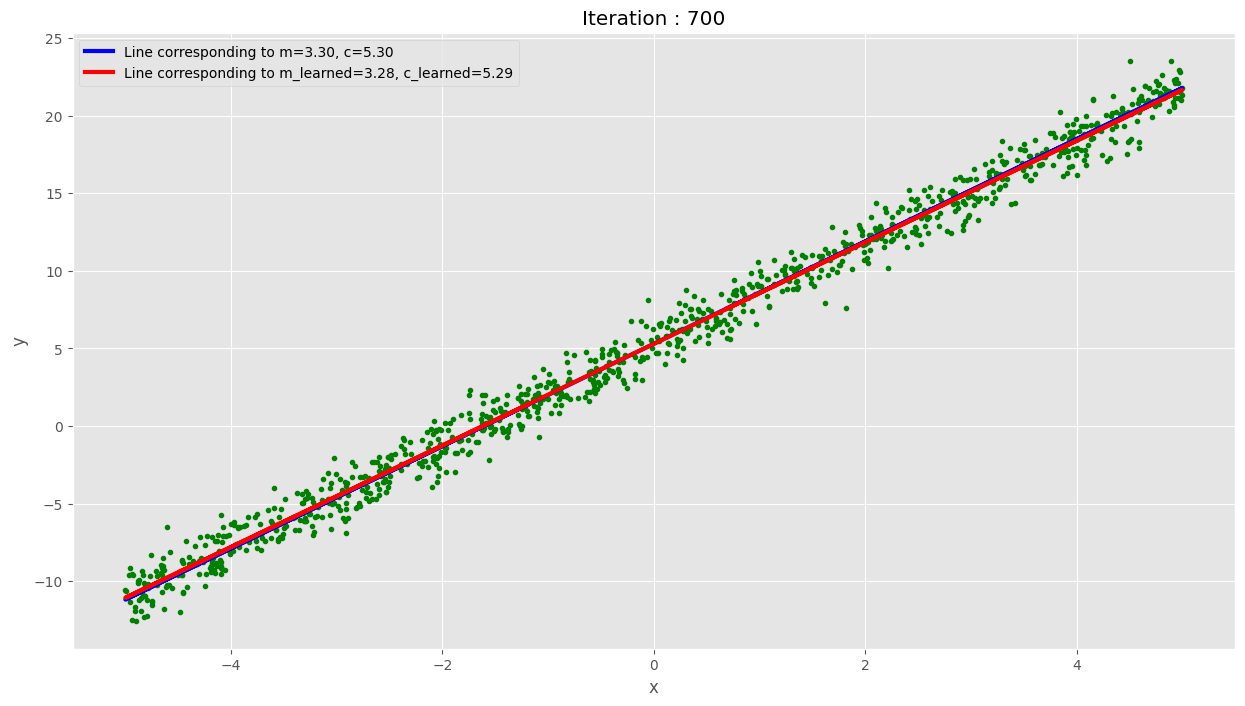

Iteration: 750, Loss: 1028.99365234375, updated m: 3.365, updated c: 5.306


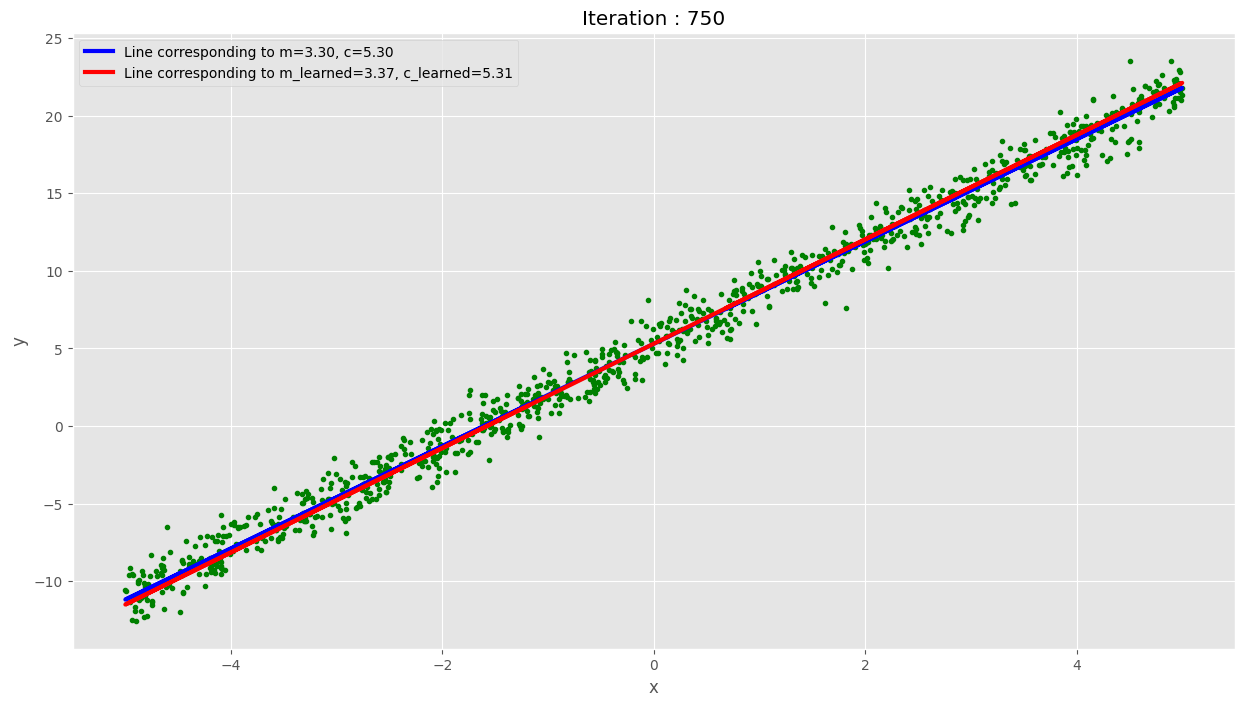

Iteration: 800, Loss: 990.0595703125, updated m: 3.235, updated c: 5.335


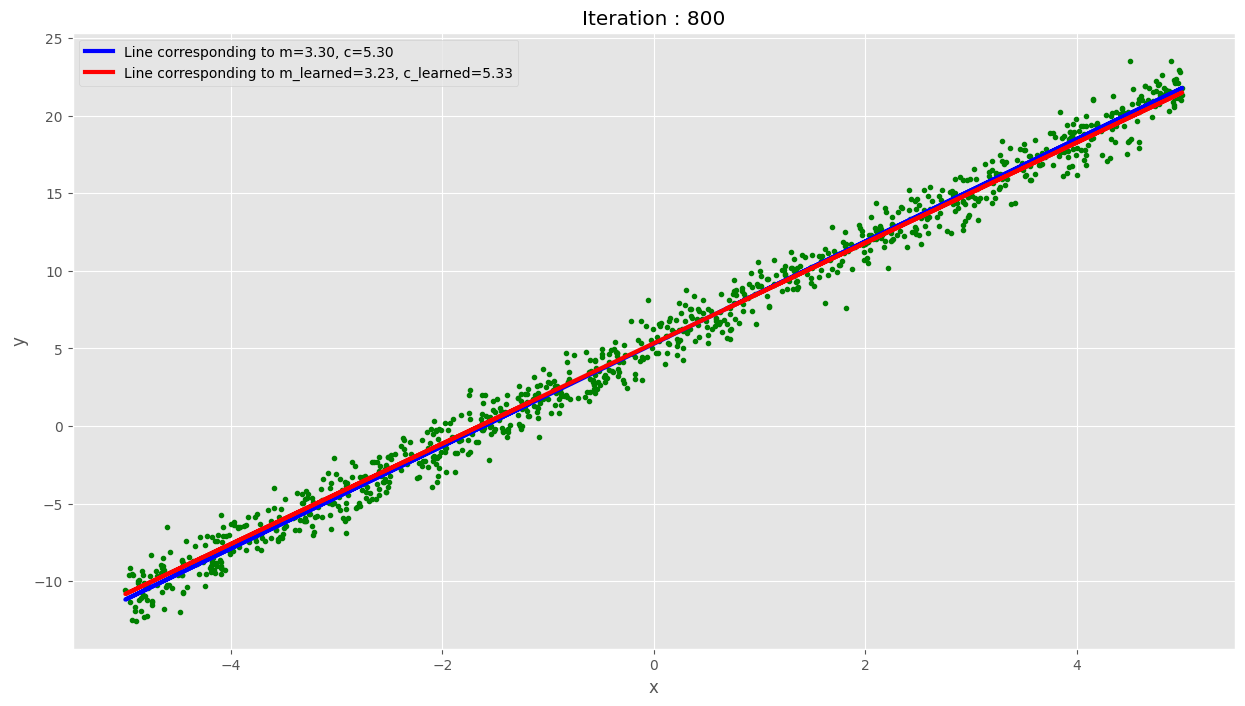

Iteration: 850, Loss: 997.59619140625, updated m: 3.226, updated c: 5.320


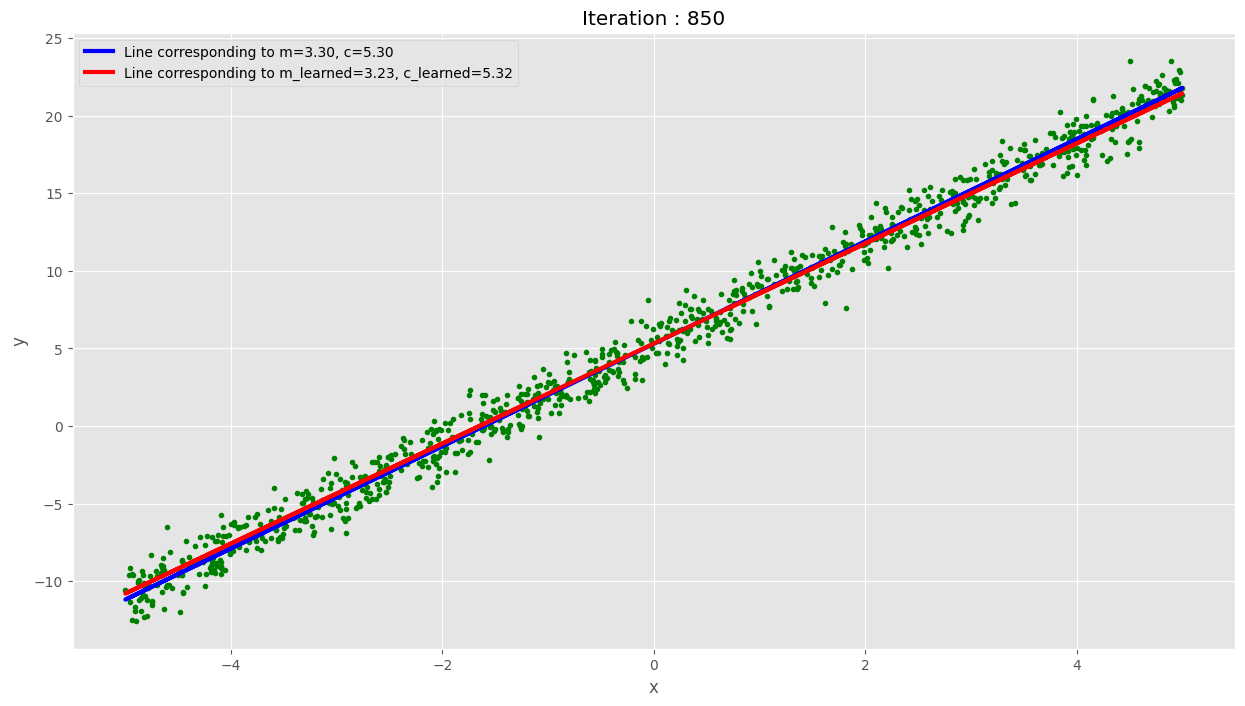

Iteration: 900, Loss: 989.985107421875, updated m: 3.240, updated c: 5.246


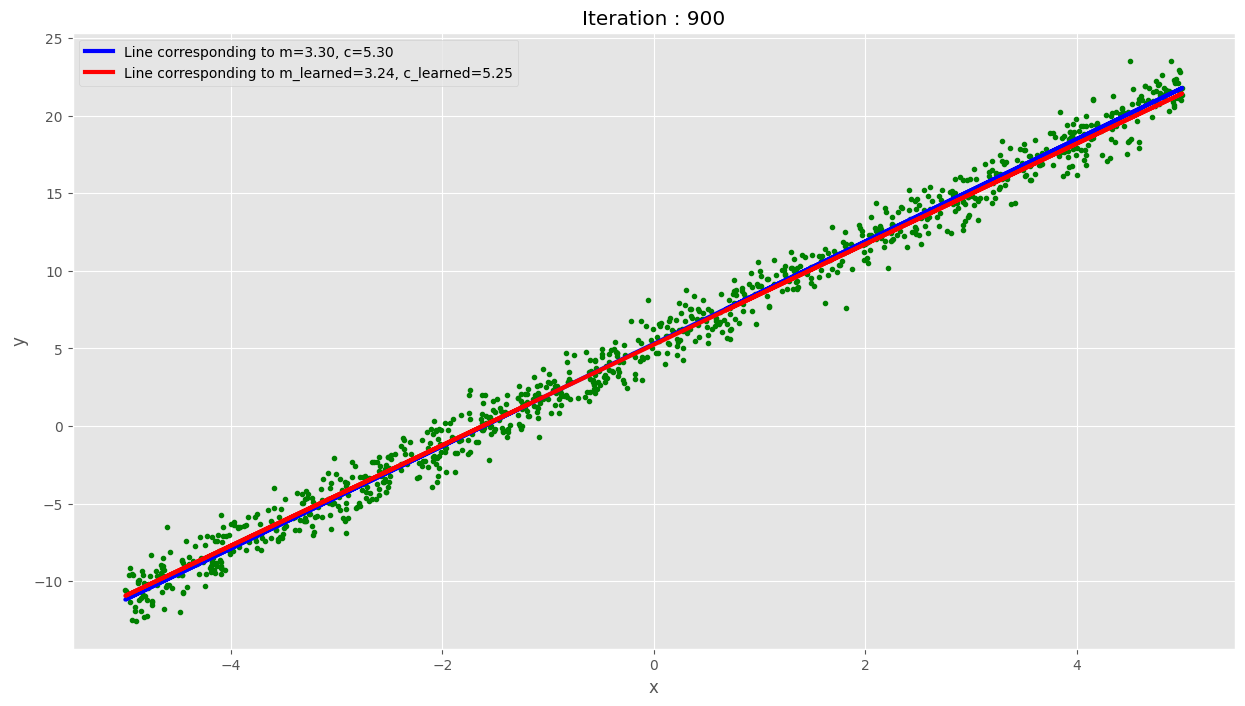

Iteration: 950, Loss: 976.6455078125, updated m: 3.258, updated c: 5.281


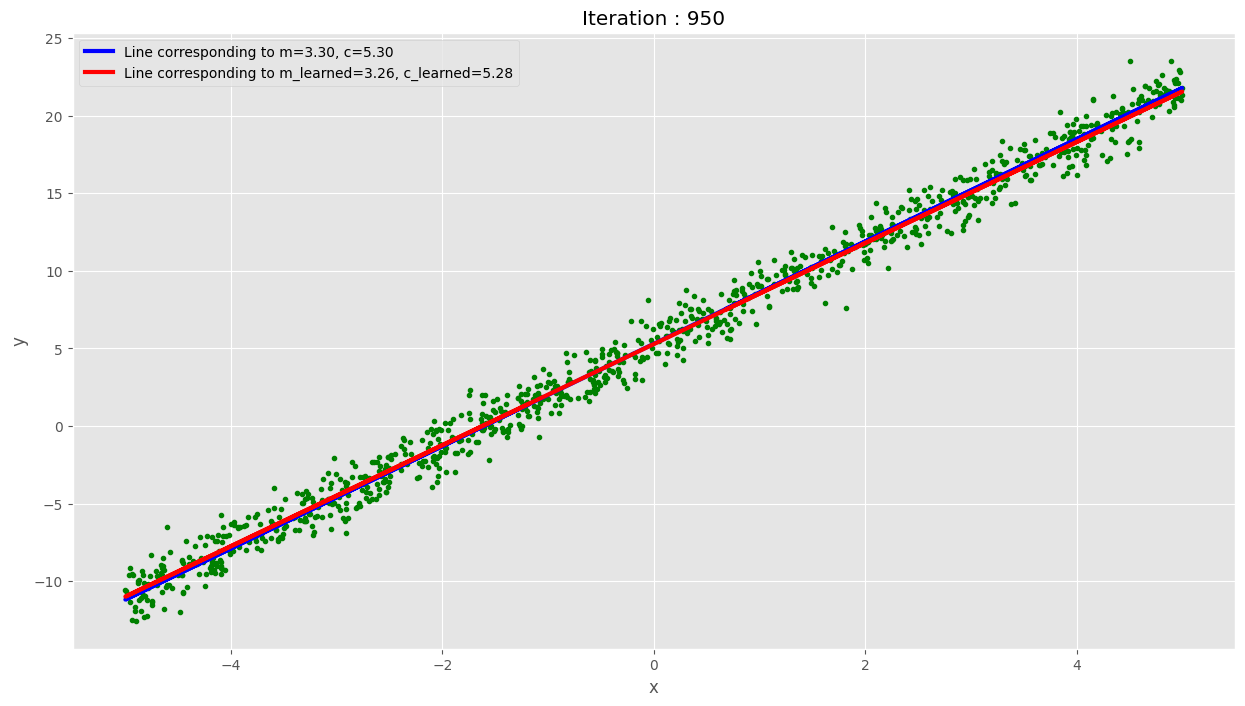

In [10]:
# Stochastic Gradient Descent with Minibatch.

# Input
X = x

# output label.
Y = y_label

num_iter = 1000
batch_size = 10

# display updated values after every 50 iterations.
display_count = 50
#

lr = 0.001
m = 2
c = 1
print()
loss = []

for i in range(0, num_iter):

    # Randomly select a training data point.
    k = tf.random.uniform(
        shape=[batch_size], minval=0, maxval=len(Y) - 1, dtype=tf.int32
    )

    # Calculate gradient of m and c using a mini-batch.
    g_m, g_c = gradient_wrt_m_and_c(X, Y, m, c, k)

    # update m and c parameters.
    m, c = update_m_and_c(m, c, g_m, g_c, lr)

    # Calculate Error.
    e = Y - m * X - c

    # Compute Loss Function.
    current_loss = tf.math.reduce_sum(tf.math.multiply(e, e))
    loss.append(current_loss)

    if i % display_count == 0:
        print(
            "Iteration: {}, Loss: {}, updated m: {:.3f}, updated c: {:.3f}".format(
                i, loss[i], m, c
            )
        )
        y_pred = m * X + c
        # Plot the line corresponding to the learned m and c.
        plt.plot(x, y_label, ".", color="g")
        plt.plot(
            x,
            y,
            color="b",
            label="Line corresponding to m={0:.2f}, c={1:.2f}".format(m_line, c_line),
            linewidth=3,
        )
        plt.plot(
            X,
            y_pred,
            color="r",
            label="Line corresponding to m_learned={0:.2f}, c_learned={1:.2f}".format(
                m, c
            ),
            linewidth=3,
        )
        plt.title("Iteration : {}".format(i))
        plt.legend()

        plt.ylabel("y")
        plt.xlabel("x")
        plt.show()

Loss of after last batch: 970.8831787109375
Leaned "m" value: 3.275660991668701
Leaned "c" value: 5.323727607727051


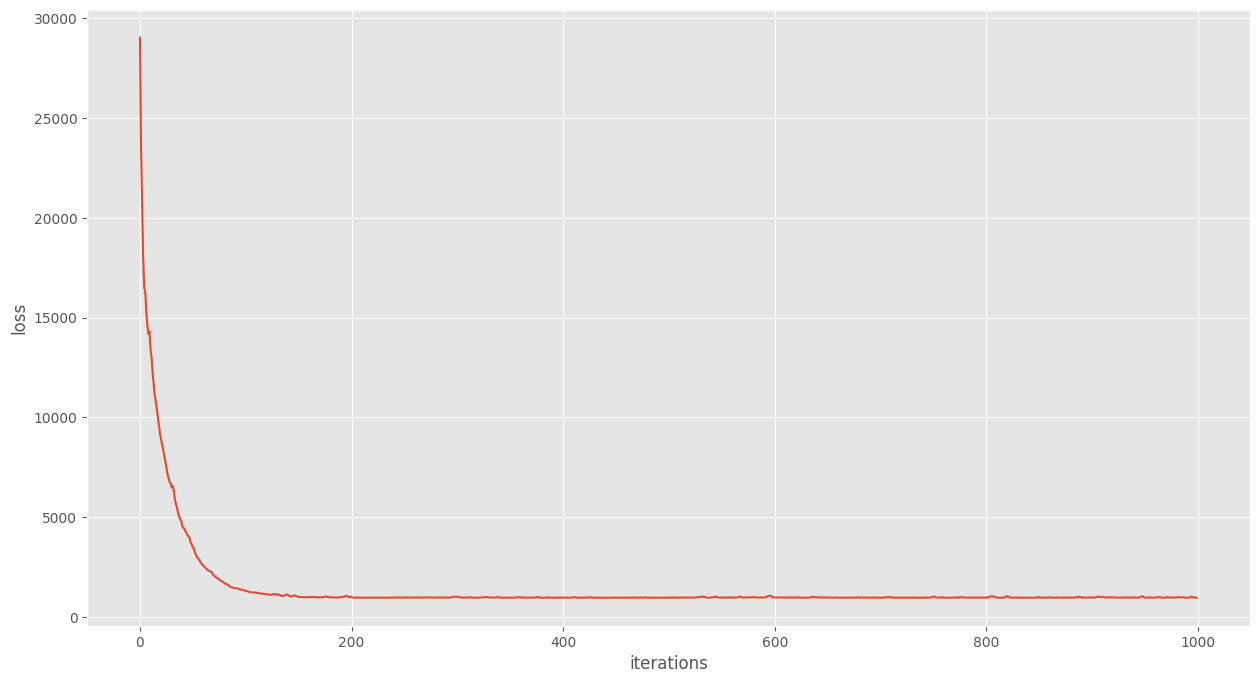

In [11]:
print("Loss of after last batch: {}".format(loss[-1]))
print('Leaned "m" value: {}'.format(m))
print('Leaned "c" value: {}'.format(c))

# Plot loss vs m.
plt.figure
plt.plot(range(len(loss)), loss)
plt.ylabel("loss")
plt.xlabel("iterations")
plt.show()

In [12]:
# Calculate the predicted y values using the learned m and c.
y_pred = m * X + c

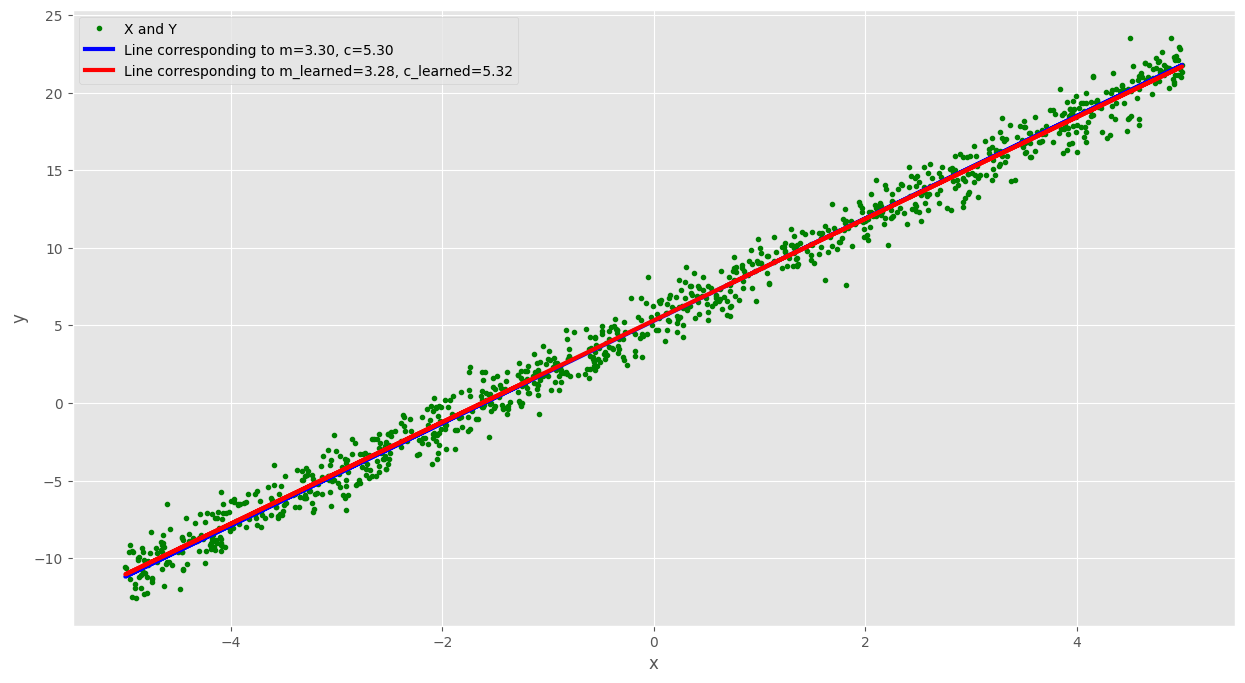

In [13]:
# Plot the line corresponding to the learned m and c
plt.plot(x, y_label, ".", color="g", label="X and Y")
plt.plot(
    x,
    y,
    color="b",
    label="Line corresponding to m={0:.2f}, c={1:.2f}".format(m_line, c_line),
    linewidth=3,
)
plt.plot(
    X,
    y_pred,
    color="r",
    label="Line corresponding to m_learned={0:.2f}, c_learned={1:.2f}".format(m, c),
    linewidth=3,
)
plt.legend()

plt.ylabel("y")
plt.xlabel("x")
plt.show()